In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from PIL import Image
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.2
matplotlib 3.4.2
pandas 1.3.3
datetime <module 'datetime' from '/Users/steffentjandra/opt/anaconda3/lib/python3.8/datetime.py'>
holidays 0.11.3
seaborn 0.11.2
plotly 5.1.0
sys 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
os <module 'os' from '/Users/steffentjandra/opt/anaconda3/lib/python3.8/os.py'>
locale <module 'locale' from '/Users/steffentjandra/opt/anaconda3/lib/python3.8/locale.py'>


In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

# Fourier-Transformation

\begin{equation}
X_{\text{k}} = \sum_{n=0}^{N-1} x_{\text{n}} . e^{-i2 \pi kn/N} = \sum_{n=0}^{N-1} x_{\text{n}} [cos(2 \pi kn/N)-i.sin(2 \pi kn/N)]
\end{equation}

- N = number of samples
- n = current sample
- k = current frequency, where 𝑘∈[0,𝑁−1]
- 𝑥𝑛 = the sine value at sample n
- 𝑋𝑘 = The DFT which include information of both amplitude and phase

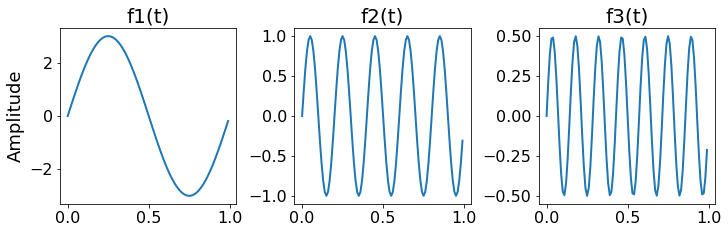

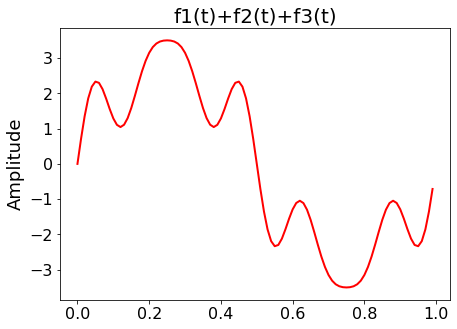

In [3]:
# Abtastrate
sr = 100
# Abtastinterval
ts = 1.0/sr
t = np.arange(0,1,ts)

#Summe von 3 unterschiedliche Sinus-Funktion
freq = 1
f1 = 3*np.sin(2*np.pi*freq*t)

freq = 5
f2 = np.sin(2*np.pi*freq*t)

freq = 7   
f3 = 0.5* np.sin(2*np.pi*freq*t)

f = f1+f2+f3

#subplot einzeln sinus Funktion
plt.figure(figsize = (10,8), constrained_layout=True)
plt.subplot(3, 3, 1)
plt.plot(t,f1)
plt.title("f1(t)")
plt.ylabel('Amplitude')

plt.subplot(3, 3, 2)
plt.plot(t,f2)
plt.title("f2(t)")

plt.subplot(3, 3, 3)
plt.plot(t,f3)
plt.title("f3(t)")

#plot addierte Funktion aus 3 Sinus Funktionen

plt.figure(figsize = (7, 5))
plt.plot(t, f, 'r')
plt.ylabel('Amplitude')
plt.title("f1(t)+f2(t)+f3(t)")

plt.show()

In [4]:
#Function to calculate the discrete Fourier Transform of a 1D real-valued signal x
def DFT(x):
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X


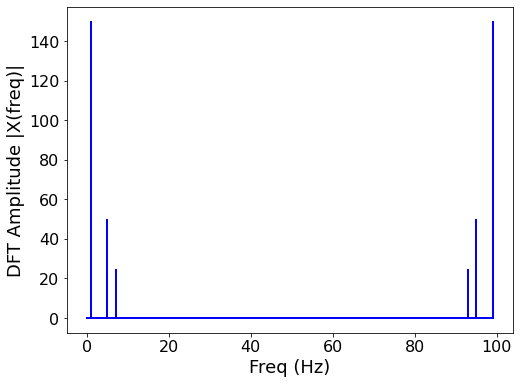

In [5]:
X = DFT(f)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). This half of the sampling rate is called Nyquist frequency or the folding frequency, it is named after the electronic engineer Harry Nyquist. He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate. [2]

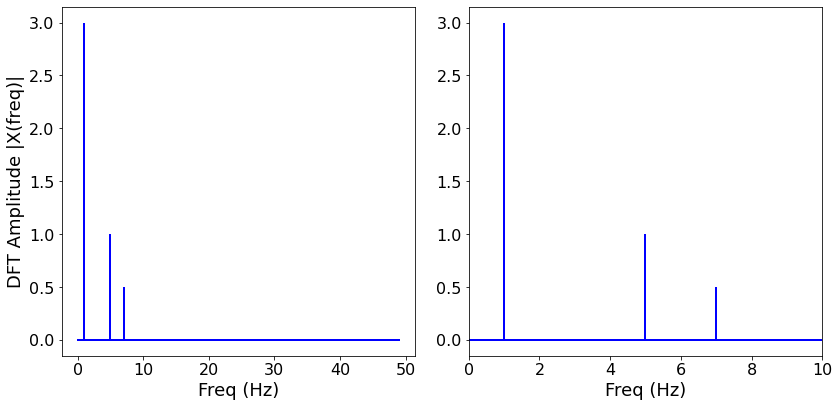

In [6]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

# Total Harmonic Distortion (THD)

\begin{equation}
V_{\text{rms}} = \sqrt{\sum_{k=1}^{\infty}\frac{V^2_{\text{k}}}{2}}=\sqrt{\sum_{k=1}^{\infty}V^2_{\text{krms}}}
\end{equation}

\begin{equation}
I_{\text{rms}} = \sqrt{\sum_{k=1}^{\infty}\frac{I^2_{\text{k}}}{2}}=\sqrt{\sum_{k=1}^{\infty}I^2_{\text{krms}}}
\end{equation}

A frequently-used measure of harmonic levels is total harmonic distortion (or distortion factor),
which is the ratio of the rms value of the harmonics (above fundamental) to the rms value of the
fundamental, times 100% [1]

\begin{equation}
THD_{\text{V}} = \sqrt{\sum_{k=2}^{\infty}\frac{V^2_{\text{krms}}}{V_{\text{1rms}}}}.100\%=\sqrt{\sum_{k=2}^{\infty}\frac{V^2_{\text{k}}}{V_{\text{1}}}}.100\%
\end{equation}

\begin{equation}
THD_{\text{I}} = \sqrt{\sum_{k=2}^{\infty}\frac{I^2_{\text{krms}}}{I_{\text{1rms}}}}.100\%=\sqrt{\sum_{k=2}^{\infty}\frac{I^2_{\text{k}}}{I_{\text{1}}}}.100\%
\end{equation}

\begin{equation}
V_{\text{rms}} = V_{\text{1rms}}\sqrt{1+(THD_{\text{V}} / 100)^2}
\end{equation}

\begin{equation}
I_{\text{rms}} = I_{\text{1rms}}\sqrt{1+(THD_{\text{I}} / 100)^2}
\end{equation}

\begin{equation}
pf_{\text{true}} = \frac{P_{\text{avg}}}{V_{\text{rms}}I_{\text{rms}}}
\end{equation}

\begin{equation}
pf_{\text{true}} = \frac{P_{\text{avg}}}{V_{\text{1rms}}I_{\text{1rms}}\sqrt{1+(THD_{\text{V}} / 100)^2}\sqrt{1+(THD_{\text{I}} / 100)^2}}
\end{equation}

**the following two assumptions:**
1. In most cases, the contributions of harmonics above the fundamental to average power are small, so that
Pavg ≈ P1avg .
2. Since
THD_V is usually less than 10%, then we see that
Vrms ≈ V1rms [1]

\begin{equation}
pf_{\text{true}} \approx \frac{P_{\text{avg}}}{V_{\text{1rms}}I_{\text{1rms}}}.\frac{1}{\sqrt{1+(THD_{\text{I}} / 100)^2}} = pf_{\text{disp}} . pf_{\text{dist}}
\end{equation}

\begin{equation}
pf_{\text{true}} \leq pf_{\text{dist}} = \frac{1}{\sqrt{1+(THD_{\text{I}} / 100)^2}}
\end{equation}

### Typical current waveforms

<img src="../img/typicalcurrentwaveform.png" alt="typicalcurrentwaveform" width="500"/>

[5]

<img src="../img/typical_current_and_voltage_waveforms.png" alt="typical_current_and_voltage_waveforms" width="900"/>

[6]

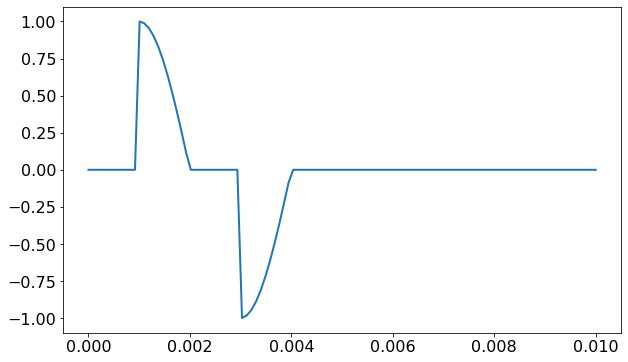

In [18]:
Time = np.linspace(0, 0.01, 110)
Amplitude = 1
Period = 0.002
Function = 0.0

Function = Amplitude * np.sin(np.pi * Time / Period)

Function[Time < 0.001] = 0.
Function[Time > 0.004] = 0.

Time = np.linspace(0, 0.01, 110)
Amplitude = 1
Period = 0.002
Function2 = 0.0

Function2 = Amplitude * np.sin(np.pi * Time / Period)
# apply setting to zero where the boolean mask is True
# the boolean mask is True, where the condition Time > Period is True
Function2[Time < 0.002] = 0.
Function2[Time > 0.003] = 0.

F3 = Function - Function2
plt.plot(Time, F3)

Problems caused by harmonics

<img src="../img/harmoniceffect.png" alt="harmoniceffect" width="500"/>

Harmonized standards for emission and immunity.

<img src="../img/harmonicstandard.png" alt="harmonicstandard" width="500"/>

[5]

<img src="../img/thd_info.png" alt="thdtable" width="900"/>

<img src="../img/thd_tableinfo.png" alt="tables__THD_current" width="800"/>

[3]

# Beispiel Code

In [9]:
d = {'Load Type': ["Ceiling Fan", "Refrigerator", "Television", "Desktop Computer and Printer"], 'pf_disp':[0.999, 0.875, 0.988,0.999]}

df = pd.DataFrame(data=d)
df

Load Type  pf_disp
0                   Ceiling Fan    0.999
1                  Refrigerator    0.875
2                    Television    0.988
3  Desktop Computer and Printer    0.999

pf_disp is commonly known as the displacement power factor, and where (δ1 − θ1) is known as the power factor angle. Therefore, in sinusoidal situations, there is only one power factor because true power factor and displacement power factor are equal.
Now, consider nonsinusoidal situations, where network voltages and currents contain harmonics. In the case of distortion power factor (p_dist), loads draw current in a non-sinusoidal manner and cause harmonic currents in building wiring and the grid.

In [10]:
df["THD_I [%]"] = [1.8, 13.4, 121, 140]
df

Load Type  pf_disp  THD_I [%]
0                   Ceiling Fan    0.999        1.8
1                  Refrigerator    0.875       13.4
2                    Television    0.988      121.0
3  Desktop Computer and Printer    0.999      140.0

\begin{equation}
pf_{\text{true}} \leq pf_{\text{dist}} = \frac{1}{\sqrt{1+(THD_{\text{I}} / 100)^2}}
\end{equation}

In [11]:
a = 1 + (df["THD_I [%]"]/100)**2
pf_dist = 1/np.sqrt(a)

df["pf_dist"] = pf_dist
df

Load Type  pf_disp  THD_I [%]   pf_dist
0                   Ceiling Fan    0.999        1.8  0.999838
1                  Refrigerator    0.875       13.4  0.991141
2                    Television    0.988      121.0  0.637046
3  Desktop Computer and Printer    0.999      140.0  0.581238

\begin{equation}
pf_{\text{true}} \approx \frac{P_{\text{avg}}}{V_{\text{1rms}}I_{\text{1rms}}}.\frac{1}{\sqrt{1+(THD_{\text{I}} / 100)^2}} = pf_{\text{disp}} . pf_{\text{dist}}
\end{equation}

In [12]:
df["pf_true"] = df["pf_disp"] * df["pf_dist"] 
df

Load Type  pf_disp  THD_I [%]   pf_dist   pf_true
0                   Ceiling Fan    0.999        1.8  0.999838  0.998838
1                  Refrigerator    0.875       13.4  0.991141  0.867248
2                    Television    0.988      121.0  0.637046  0.629402
3  Desktop Computer and Printer    0.999      140.0  0.581238  0.580657

# Beispiel Ladekabel Apple 12W aus Praktikum

**Apple Ladekabel**

**P = 12W\
Kabellänge = 1m**

<img src="../img/ladekabel_apple_pic.png" alt="ladekabel" width="400"/>

<img src="../img/oszi_info_ladekabel1.png" alt="oszi_info" width="400"/>

<img src="../img/oszi_info_ladekabel_2.png" alt="oszi_info2" width="300"/>

<img src="../img/oszi_info_ladekabel_3.png" alt="oszi_info3" width="300"/>

In [13]:
P = 6.342 #W
Urms = 228.24 #V 
Irms = 71.25*10**-3 #A
phi = 8.7 #degree
phi_rad = 8.7 *(np.pi/180) #von Degree zu Radian

pf_disp_ch =  np.cos(phi_rad)
print("Verschiebungsleistungsfaktor (pf_disp) des Ladekabels: " + str(pf_disp_ch) )


Verschiebungsleistungsfaktor (pf_disp) des Ladekabels: 0.9884938868086836


\begin{equation}
pf_{\text{dist}} = \frac{1}{\sqrt{1+(THD_{\text{I}} / 100)^2}}
\end{equation}

\begin{equation}
pf_{\text{true}} \approx pf_{\text{disp}} . pf_{\text{dist}}
\end{equation}

In [14]:
a = 1 + (232.43/100)**2
pf_dist_ch = 1/np.sqrt(a)

#pf_true_ch = P/(Urms*Irms)
pf_true_ch = pf_disp_ch*pf_dist_ch
print("Der Distortionleistungsfaktor des Ladekabels: " + str(pf_dist_ch) )
print("Der genaue Leistungsfaktor des Ladekabels: " + str(pf_true_ch) )

Der Distortionleistungsfaktor des Ladekabels: 0.395211523284281
Der genaue Leistungsfaktor des Ladekabels: 0.3906641747628595


In [15]:
new_row = {'Load Type':'Ladekabel Apple 12W', 'pf_disp':pf_disp_ch, 'THD_I [%]':232.43, 'pf_dist':pf_dist_ch, 'pf_true':pf_true_ch}
df = df.append(new_row, ignore_index=True)

df

Load Type   pf_disp  THD_I [%]   pf_dist   pf_true
0                   Ceiling Fan  0.999000       1.80  0.999838  0.998838
1                  Refrigerator  0.875000      13.40  0.991141  0.867248
2                    Television  0.988000     121.00  0.637046  0.629402
3  Desktop Computer and Printer  0.999000     140.00  0.581238  0.580657
4           Ladekabel Apple 12W  0.988494     232.43  0.395212  0.390664

# Leistungsfaktorkorrektur [1]

Because of the non-linear (e.g. electronic lamps, power electronic devices, etc) loads, when connected to sinusoidal voltage the devices create non linear currents (as it can be seen it the figure from Praktikum). The possible solution for reducing the harmonics are increasing the fault level of the grid (reduce the network impedance), limit total output / simultaneously working harmonic sources, balance the connection of single-phase loads to all three phases, and use equipment with higher pulse number. However the most common solutions are:
1. passive filter (RC, RL , LC, LCQ and others)
2. active filter


<img src="../img/PFCtopologies.png" alt="PFCtopologies" width="500"/>

[5]

### Passive Filters

Specific frequiency is observed to design the passive filter circuit. The resonance frequencies of the series filter circuits are very close to existing harmonics.

<img src="../img/pasvfilter_1.png" alt="passivefilter1" width="500"/>

#### Case of study in a mall in china

<img src="../img/pasvfilter_2.png" alt="passivefilter2" width="500"/>

Filter results Tuned filter application at Jiu mall in China

<img src="../img/pasvfilter_3.png" alt="passivefilter3" width="500"/>

**Advantage**: 
- Cost

**Disadvatages**:
- time consuming
- careful network study necessary
- the risk of overload due to more harmonic load and polluted background distortion

### Case Study in a Steel Mill Power System [4]

The rolling mill for plate processing is operated in the acceleration speed, pass, and idling modes. To satisfy these characteristics, precise control performance of constant torque and braking characteristics are required in response to a wide speed control range and whirlwind overload. Generally, the voltage drop and the voltage distortion of the mill motor drive converter system reduce the output torque of the motor drive and adversely affect the control performance. Therefore, proper reactive power compensation and harmonic mitigation of the mill motor drive system can reduce the system losses and increase the productivity and quality of the plate

<img src="../img/passfilsteel_1.png" alt="passfilsteel_1" width="800"/>

Summation of major input data.

<img src="../img/passfilsteel_2.png" alt="passfilsteel_2" width="600"/>

ESA (Easy Power System Software) calculation results for load flow, Vthd, and power factors without filter

<img src="../img/passfilsteel_3.png" alt="passfilsteel_3" width="600"/>

ESA calculation results for load flow, Vthd, and power factors with filter.

<img src="../img/passfilsteel_6.png" alt="passfilsteel_6" width="600"/>

ESA calculation results for IEEE Std. 519 current report without filter-1.

<img src="../img/passfilsteel_4.png" alt="passfilsteel_4" width="600"/>

 ESA calculation results for IEEE Std. 519 current report with filter-1.

<img src="../img/passfilsteel_7.png" alt="passfilsteel_7" width="600"/>

ESA calculation results for IEEE Std. 519 current report without filter-2.

<img src="../img/passfilsteel_5.png" alt="passfilsteel_5" width="600"/>

ESA calculation results for IEEE Std. 519 current report with filter-2.

<img src="../img/passfilsteel_8.png" alt="passfilsteel_8" width="600"/>

Measured S, P, and Q on plate mill system

<img src="../img/passfilsteel_9.png" alt="passfilsteel_9" width="800"/>

Measured V for 22 kV plate mill system

<img src="../img/passfilsteel_10.png" alt="passfilsteel_10" width="800"/>

##### Kosten

In [47]:
# This has the effect of reducing about 84,000$ (US) per year (reflecting(40 MVA). This has the effect 
# of reducing about 84,000$ (US) per year (reflecting Korean electricity bills)
# , and it is estimated that it will take about 5.4 years to recover the investment


#switch gears and cubicles, protection relays, capacitors, series reactors
PFC_kosten = 450*10**(3) #$ USD
Kosten_gespart = 84*10**(3) #$ USD
E_gespart = 0.004 #0.4%
Total_Leistung = 40*10**(3) #kVA averarage load

In [48]:
PFC_kosten_perkVA = PFC_kosten / Total_Leistung
print("Leistungsfaktorkorrektur Kosten: " + str(PFC_kosten_perkVA) +"$/kVA" )

Leistungsfaktorkorrektur Kosten: 11.25$/kVA


In [49]:
Total_E_gespart_im_Jahr = E_gespart * Total_Leistung * 24 * 365
print("Total Energie gespart im Jahr: " + str(Total_E_gespart_im_Jahr) +"kWh" )

Total Energie gespart im Jahr: 1401600.0kWh


## Active Filters

Active harmonic filters serve the purpose of reducing harmonics caused by non-linear consumers and provide highly dynamic reactive power according to requirements. There are different basic structures of active harmonic filters: serial connection, parallel connection, and a combination of both. In case of parallel connection of the active filter the AHF acts as a current source; with the direct current injection the harmonic current distortions are reduced.

The advantage of a parallel connected AHF solution is that it is simply to retrofit and to scale, for the measurement standard CTs are sufficient. The disadvantages are that the harmonic voltage could be only influenced indirectly and there is no voltage buffering possible.

\begin{equation}
I_{\text{Grid}} = I_{\text{AHF}} + I_{\text{Load}}
\end{equation}

<img src="../img/ahf1.png" alt="activefilter1" width="500"/>

## Schaltung

<img src="../img/activefilter_Schaltungen.png" alt="activefilter_Schaltungen" width="500"/>

Result THD_I after active harmonic filter

<img src="../img/ahf2.png" alt="activefilter2" width="500"/>

Total harmonic distortion in frequency domain (a) without active filter and (b) with active filter

### Harmonic compensation examples with PQSine active harmonic filter

<img src="../img/ahf3.png" alt="activefilter3" width="500"/>

<img src="../img/ahf4.png" alt="activefilter4" width="500"/>

### Case of Study at car manufacturer (a) 

Without PQSine, THD-I=30% in time domain

<img src="../img/ahf6.png" alt="activefilter6" width="300"/>

With PQSine, THD-I<5% in time domain.

<img src="../img/ahf7.png" alt="activefilter7" width="300"/>

### Case of study air conditioning container (b)

THDi (%) without PQSine AHF at 180 (A) of load current.

<img src="../img/ahf8.png" alt="activefilter8" width="300"/>

THDi (%) with PQSine AHF at 180 (A) of load current.

<img src="../img/ahf9.png" alt="activefilter9" width="300"/>

In both cases the compensation results are under 5% achieving the standard IEEE519. In the case study B the compensation reaches a value approximately of 0.7% of THDi decreasing the harmonic distortions with very satisfactory results.

<img src="../img/ahf5.png" alt="activefilter5" width="500"/>

## Quelle

[1] L. Motta and N. Faúndes, "Active / passive harmonic filters: Applications, challenges & trends," 2016 17th International Conference on Harmonics and Quality of Power (ICHQP), 2016, pp. 657-662, doi: 10.1109/ICHQP.2016.7783319.

[2] https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

[3] Michalec, Ł.; Jasi ´nski, M.; Sikorski, T.; Leonowicz, Z.; Jasi ´nski, Ł.; Suresh, V. Impact of Harmonic Currents of Nonlinear Loads on Power Quality of a Low Voltage Network–Review and Case Study. Energies 2021, 14, 3665. https://doi.org/10.3390/en14123665

[4] Park, B.; Lee, J.; Yoo, H.; Jang, G. Harmonic Mitigation Using Passive Harmonic Filters: Case Study in a Steel Mill Power System. Energies 2021, 14, 2278. https://doi.org/10.3390/en14082278

[5] Lumbreras, D.; Gálvez, E.; Collado, A.; Zaragoza, J. Trends in Power Quality, Harmonic Mitigation and Standards for Light and Heavy Industries: A Review. Energies 2020, 13, 5792. https://doi.org/10.3390/en13215792

[6] Zheng, Z.; Chen, H.; Luo, X. A Supervised Event-Based Non-Intrusive Load Monitoring for Non-Linear Appliances. Sustainability 2018, 10, 1001. https://doi.org/10.3390/su10041001

# Residual Current Device

Czapp S, Tariq H. Behavior of Residual Current Devices at Frequencies up to 50 kHz. Energies. 2021; 14(6):1785. https://doi.org/10.3390/en14061785

## Introduction

Effective protection against electric shock in modern low-voltage electrical installations
depends a lot on the proper selection, application, and operation of residual current devices
(RCDs). 

**the standard HD (IEC) 60364-4-41** shows that the highly- sensitivity RCDs **(rated residual operating current not exceeding 30 mA) are obligatory in socket-outlets circuits up to 32 A intended for general use, mobile equipment circuits up to 32 A** for using in outdoors, and lighting circuits in premises designed to accommodate a single household. 

Even wide application of RCDs is required in special installations
and locations mentioned in the 700 series of the standard HD (IEC) 60364 “Low-voltage
electrical installations”. Such widespread use of RCDs as well as utilization of electronic
equipment producing various shapes of earth fault currents prompt scientists and engineers
from many countries to focus on the operation of RCDs under waveforms different than
sinusoidal of the 50/60 Hz.

While the negative influence of the DC component of the residual current on the operation of RCDs has been recognized a long time ago [2,3] and the solutions are widely known [4–7], the influence of high frequencies is still being investigated.

The conclusion is that high frequency residual current changes the tripping threshold of RCDs and in some cases this threshold can be many times higher than for frequency 50 Hz.

They conclude that highorder harmonics may increase the tripping threshold of RCDs which can be quite dangerous
for human life. Detection and analysis of the advanced signals, including distorted residual
current generated in variable-speed drive circuits, are considered in [20,21]. It is mentioned that a pulse width modulated residual waveform may not be detected by some types of RCDs.

Admittedly, the national German standard [27] provides RCDs, which are able to react within the extended frequency range -- up to 20 kHz but this type of RCDs is not widely met.

#### [27] VDE. DIN VDE 0664-400:2020-03. 
Residual Current Operated Circuit-Breakers Type B without Integral Overcurrent Protection to Operate
at Residual Alternating and Residual Direct Currents for Advanced Preventative Protection against Fire–Part 400: RCCB Type B+; VDE:
Berlin, Germany, 2020.

## RCDs Construction and Normative Requirements Related to Their Tripping

Commonly used RCDs are **voltage-independent** and their structure is presented in Figure 1a. Elements responsible for the detection of the residual (earth) current i∆ and the tripping are a current transformer (CT) and an electromechanical relay (RY)

<img src="../img/structure_of_residualcurrentdevice1.png" alt="structure_of_RCD" width="500"/>

### The equivalent circuit (a)

<img src="../img/equivalent_circuit_of_RCD.png" alt="ESB_of_RCD" width="500"/>

AC-type RCDs ensure tripping for residual sinusoidal alternating currents (suddenly
applied or slowly rising). Sinusoidal testing current should have network frequency,
usually 50 or 60 Hz.

**A-type RCDs ensure tripping for:**
- waveform the same as the AC-type;
- residual pulsating direct currents (suddenly applied or slowly rising) having the following current delay angles: 0◦, 90◦ and 135◦;
- residual pulsating direct current (current delay angle: 0◦) superimposed by smooth direct component of 6 mA; F-type RCDs ensure tripping for:
- waveforms the same as the A-type;
- residual pulsating direct currents superimposed by smooth direct component of 10 mA;
- mixed-frequency residual current (suddenly applied or slowly rising) intended for circuit supplied between phase and neutral or phase and earthed middle conductor;

**B-type RCDs ensure tripping for:**
- waveforms the same as the F-type;
- residual sinusoidal alternating currents up to 1 kHz;
- residual alternating currents superimposed by a smooth direct current of 0.4 times the rated residual current;
- residual pulsating direct currents superimposed by a smooth direct current of 0.4 times the rated residual current or 10 mA, whichever has a higher value;
- residual direct currents obtained from rectifying circuits as: two-pulse bridge connection line-to-line for 2-, 3-, and 4-pole RCDs, three-pulse star connection or six-pulse bridge connection for 3- and 4-pole RCDs;
- residual smooth direct currents.

.

Residual current devices’ usage has been made obligatory not only from the modern domestic point of view but as well as for industrial purposes. The principal objective of this device is protection against electric shock in the case of either direct or indirect contact. **The most challenging situation for such devices is when they are exposed to residual currents containing high-frequency contents.** Under such circumstances this device may not be able to trip at the expected threshold and, therefore protection against electric shock may not be ensured. 

## Conclusion

Research conducted by the authors and its results presented in this paper show that
there is a strong effect of frequency on the tripping threshold of RCDs. While up to 1 kHz
the tripping of RCDs was noted, for frequencies 5 kHz, 10 kHz, 20 kHz, and 50 kHz there
were no RCDs reactions to the test currents (except one AC-type RCD reacting to the
5 kHz), even 15 times higher than the rated residual current of the RCD.

In the light of the switching frequency used in modern power electronics converters, such a level of testing frequency (1 kHz) seems to be insufficient. Therefore, it is proposed to raise the threshold of the
normative testing current from 1 kHz to at least 10 kHz. For special applications, a separate
type of RCDs is recommended to be provided. RCDs of the special type (frequency-proof)
should be able to trip for frequencies up to 50 kHz.